In [1]:


import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [2]:
cols = ['Recency', 'Frequency', 'Monetary', 'Time', 'Target']

In [3]:
url = "https://raw.githubusercontent.com/eunandocosta/transfusion_dataset/main/transfusion.data"

In [4]:
data = pd.read_csv(url, names=cols, skiprows=1, delimiter=',')
data.head()

,Recency,Frequency,Monetary,Time,Target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [5]:
array = data.values

X = array[: , :4]
y = array[:, 4]

In [6]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

In [7]:
np.random.seed(7) # definindo uma semente global

modelos = []

modelo_nome = 'transfusion_frequency'

modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('NB', GaussianNB()))
modelos.append(('SVM', SVC()))

In [8]:
# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in modelos:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.764322 (0.043223)
CART: 0.715876 (0.067806)
NB: 0.757458 (0.033256)
SVM: 0.762514 (0.010552)


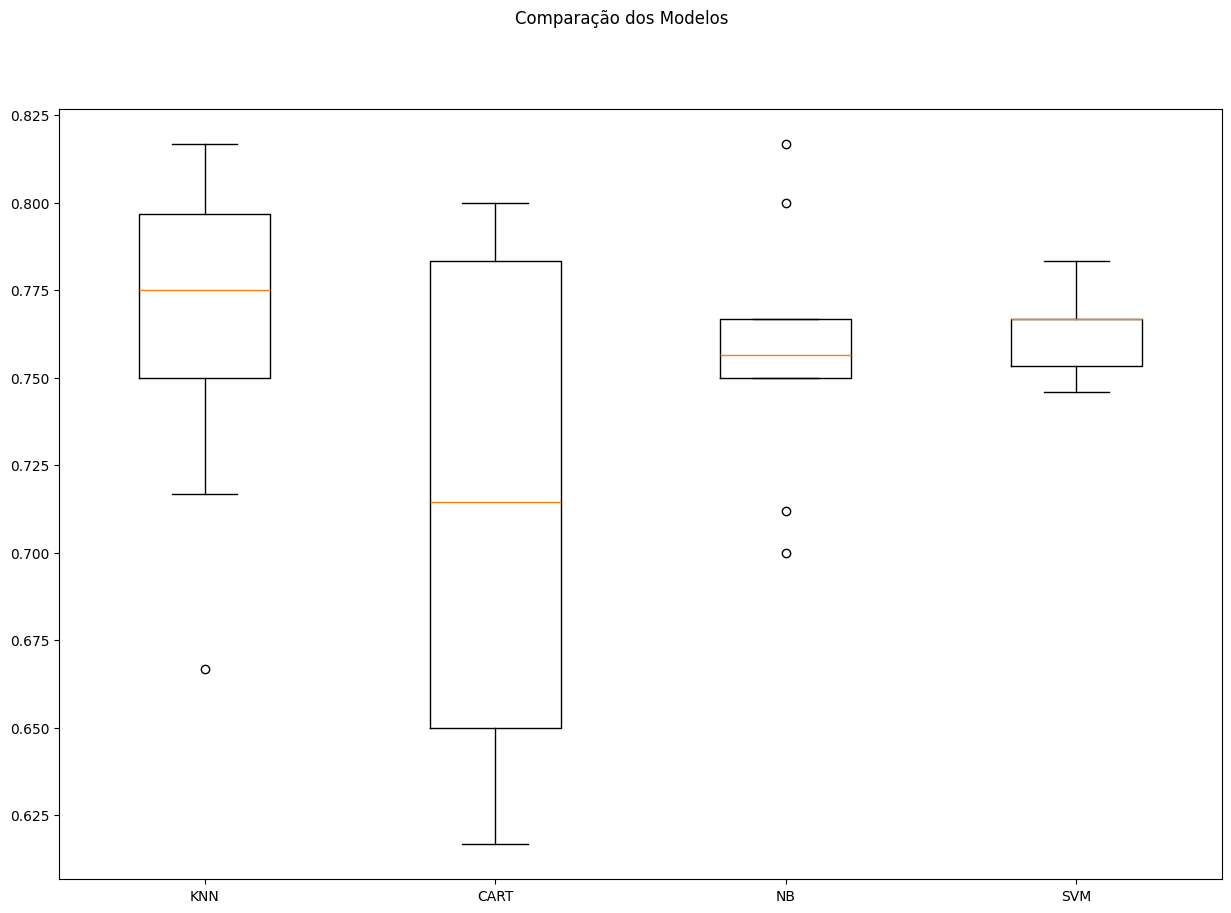

In [9]:
# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

KNN-orig: 0.764 (0.043)
CART-orig: 0.716 (0.068)
NB-orig: 0.757 (0.033)
SVM-orig: 0.763 (0.011)
KNN-padr: 0.761 (0.038)
CART-padr: 0.711 (0.073)
NB-padr: 0.757 (0.033)
SVM-padr: 0.771 (0.015)
KNN-norm: 0.761 (0.037)
CART-norm: 0.713 (0.077)
NB-norm: 0.757 (0.033)
SVM-norm: 0.769 (0.017)


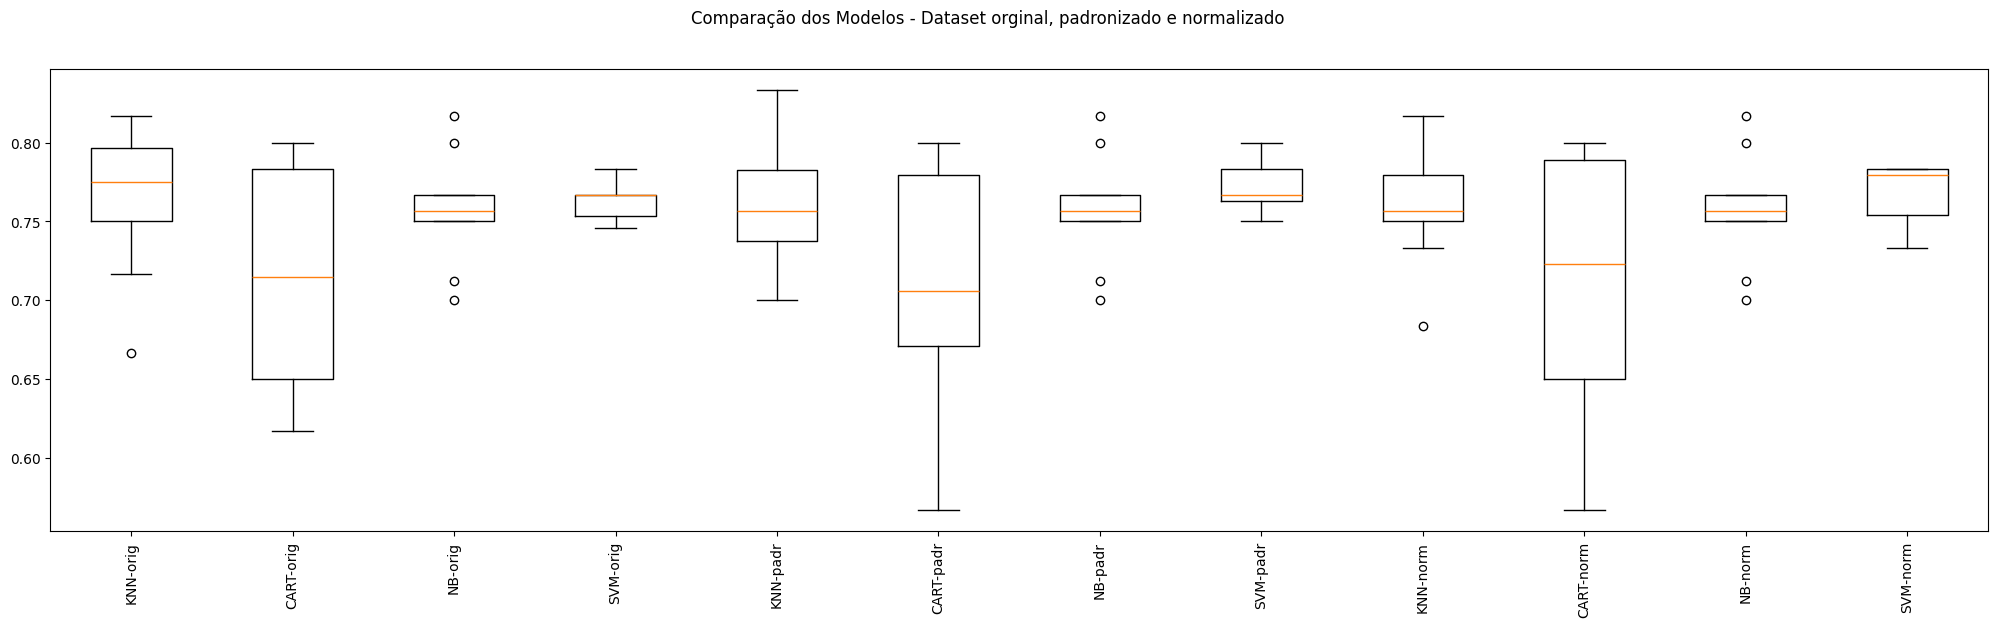

In [10]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines

for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

In [11]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.765989 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 7}
Sem tratamento de missings: knn-padr - Melhor: 0.790960 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 13}
Sem tratamento de missings: knn-norm - Melhor: 0.790989 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 21}


In [12]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = KNeighborsClassifier(metric='manhattan', n_neighbors=17)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.8133333333333334


In [13]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

KNeighborsClassifier(metric='manhattan', n_neighbors=17)

In [14]:
# Novos dados - não sabemos a classe!
data = {'rec': [6, 4, 5],
        'freq': [5, 6, 4],
        'mon': [3000, 3000, 3000],
        'time': [23, 60, 16]
        }

atributos = ['rec', 'freq', 'mon', 'time']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:4].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[-0.43346009 -0.08820401  1.11137048 -0.46313192]
 [-0.68067941  0.08316378  1.11137048  1.05572566]
 [-0.55706975 -0.25957179  1.11137048 -0.75048336]]


In [15]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[1 0 1]


In [16]:
pkl_file = modelo_nome + '.pkl'

pkl_path = pkl_file

leaded_pkl_model = model.fit(rescaledX, y)
    

with open(pkl_path, 'wb') as model_file:
  pickle.dump(leaded_pkl_model, model_file)

In [17]:
leaded_pkl_model

KNeighborsClassifier(metric='manhattan', n_neighbors=17)

In [18]:
pkl_results = leaded_pkl_model.score(X_test, y_test)
pkl_results

0.76

In [ ]:
"""Conclusão do desenvolvimento do projeto de machine learning de um dataset que contém informações sobre doadores de sangue e a chance de retorno para doar"""

"""Primeiramente recebemos dados da última doação, quantidade de doação (ou frequência - como chamamos), renda e tempo desde a primeira doação"""

"""Target funciona como um resultado dessas medidas. Neste processo utilizamos o método KNN - Manhattan, que apresentou melhores resultados"""

"""No backend espera-se armazenar dados que serão lidos e retornarão o resultado de Target"""

"""No frontend espera-se exibir e dar informações mais claras do que 0 e 1 para target, oferecendo resultados como Não ou Sim para possibilida de retorno"""